In [5]:
import pandas as pd
import numpy as np
#import torch.nn as nn
from sklearn.model_selection import train_test_split
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn import preprocessing
import math
import warnings
from tensorflow import get_logger
from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

df = pd.read_csv("normalized_numerical_data.csv")
#df = pd.read_csv("normalized_numerical_data.csv")

print ("Here1")

df.head
X = df.drop(["gender"], axis=1)
y = np.array(df['gender'])
X.head
print(X.shape)
num_feat = X.shape[1]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=400)

print ("Here2")

le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_train
X_test.reset_index()

print ("Here3")

def generateLayersNodes(n,input_nodes, output_nodes):
    layers = []
    change = (output_nodes-input_nodes)/ (n-1)
    nodes = input_nodes
    for i in range(1,n+1):
        layers.append(math.ceil(nodes))
        nodes+=change
    return layers

def createModel(n_layers,in_nodes,out_nodes, ac, lf,lr):
    model = Sequential()
    nodes_for_layers = generateLayersNodes(n_layers,in_nodes,out_nodes)
    for i in range(1,n_layers):
        if i == 1:
            model.add(Dense(in_nodes,input_shape = (7,),activation =ac ))
        else:
            model.add(Dense(nodes_for_layers[i-1],activation =ac ))
    model.add(Dense(1,activation=ac))
    model.compile(loss=lf,optimizer=tf.keras.optimizers.Adam(learning_rate=lr),metrics=['accuracy'])
    return model

def get_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    return model

clf = KerasClassifier(
    model=get_clf,
    loss="binary_crossentropy",
    optimizer="adam",
    optimizer__lr=0.1,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.5,
    verbose=False,
)

params = {
    'optimizer__lr': [0.05, 0.1],
    'model__hidden_layer_sizes': [(100, ), (50, 50, )],
    'model__dropout': [0, 0.5],
}

gs = HalvingGridSearchCV(clf, params, scoring='accuracy', n_jobs=-1, verbose=True)

print ("Here4")

gs.fit(X_train, y_train)

print ("Here5")

print(gs.best_score_, gs.best_params_)

f = open("ann_params.txt", "w")
f.write("Best Score : "+str(gs.best_score_))
f.write(str(gs.best_params_))
f.close()

print ("Here6")

Here1
(5001, 7)
Here2
Here3
Here4
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1333
max_resources_: 4000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 1333
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 1
n_candidates: 3
n_resources: 3999
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Here5
0.9629536921151439 {'model__dropout': 0, 'model__hidden_layer_sizes': (100,), 'optimizer__lr': 0.1}
Here6


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

y_hat_test = gs.predict_proba(X=X_test)
y_pred = gs.predict(X_test)

y_decision_test = []
for i in range(len(y_pred)):
    unit = y_hat_test[i]
    if unit[0] < 0.5:
        y_decision_test.append(1)
    else:
        y_decision_test.append(0)
R_test = []
for i in range(len(y_decision_test)):
    if y_decision_test[i] == y_test[i]:
        R_test.append(1)
    else:
        R_test.append(0)
Accuracy_test = np.sum(R_test) / len(y_decision_test)
print(Accuracy_test)

y_hat = []
for i in y

Output = X_test
Output.insert(7, "gender", y_test)
Output.insert(8, "gender_predicted", y_hat_test)
Output.to_csv('ANNNumericalResults.csv')

print(confusion_matrix(y_test,y_pred))

0.967032967032967


ValueError: ignored

In [14]:
from sklearn.metrics import auc

y_pred_keras = gs.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

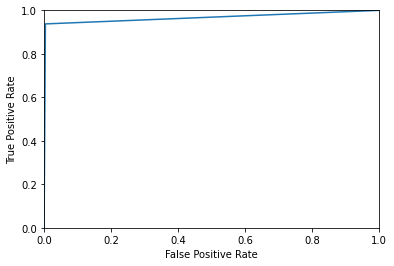

In [19]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr_keras,tpr_keras)

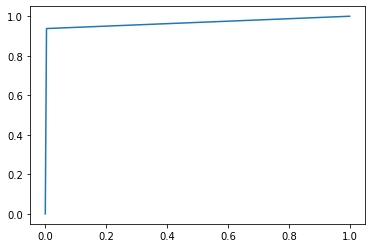

In [16]:
import matplotlib.pyplot as plt


plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))


In [29]:
knn_y_proba = gs.predict_proba(X=X_test)
knn_y_proba[0:10]

array([[3.7243366e-03, 9.9627566e-01],
       [2.2555292e-01, 7.7444708e-01],
       [9.9981636e-01, 1.8362570e-04],
       [9.9966329e-01, 3.3671086e-04],
       [9.9939591e-01, 6.0410739e-04],
       [9.9952036e-01, 4.7961809e-04],
       [1.2753606e-03, 9.9872464e-01],
       [9.9948514e-01, 5.1484077e-04],
       [9.9962288e-01, 3.7714344e-04],
       [9.9983871e-01, 1.6129184e-04]], dtype=float32)

In [33]:
y_pred_keras[0:10]

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [22]:
!pip install scikitplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [12]:
y_pred_keras

array([1, 1, 0, ..., 1, 0, 0])

In [4]:
import os
from google.colab import drive
drive.mount("/content/drive/")
os.chdir("drive/My Drive/Colab Notebooks/CSE 512 Project/ANN")

Mounted at /content/drive/


In [2]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
